# 22b - Cantera

Per Cantera's website (https://cantera.org/):
> Cantera is an open-source suite of tools for problems involving chemical kinetics, thermodynamics, and transport processes.

First import Cantera or install then import if needed:

In [1]:
try: 
    import cantera as ct
except:
    !pip install cantera
    import cantera as ct

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Thermodynamics: Water
Lets first use the thermodynamics portion of Cantera with water. Cantera has all of the steam tables internally. For example, if you open the steam table at thermopedia for example, you'll see that the enthalpy of saturated water at 100C is 419.06 kJ/kg. We can use Cantera to verify this.

In [3]:
w = ct.Water() #units are in SI and kmol
wz = ct.Water() #water at 273.15 K and saturated liquid
wz.TQ = 273.16, 0
w.TQ = 277.15, 0 # Q is quality, 0 is saturated liquid, 1 is saturated vapor
print(f'The liquid enthalpy at {w.T:1.2f} is {w.h-wz.h:1.2f} J/kg relative to saturated water at 273.16')
print(f'The liquid entropy at {w.T} is {w.s-wz.s:1.2f} J/kg/K relative to saturated water at 273.16')

The liquid enthalpy at 277.15 is 16770.34 J/kg relative to saturated water at 273.16
The liquid entropy at 277.15 is 60.95 J/kg/K relative to saturated water at 273.16


By comparison, the steam tables yield a very similar value of 16820 J/kg and 61.12 J/kg/K for the specific enthalpy and entropy of the liquid.

### Normal boiling point 

What is the temperature at the normal boiling point of water:

In [4]:
#what is the temperature and other properties at 1 atm and saturated vapor?
w.PQ = 101325, 1 # 1 atm (101325 Pa), saturated vapor

In [5]:
print(w.T,w.h,w.s,w.Q,w.density, 'all in SI units for the saturated vapor K, J/kg, J/kg/K, dimensionless, kg/m^3, respectively')

373.17723294438696 -13294694.765606625 10875.07020588383 1.0 0.5975729001239033 all in SI units for the saturated vapor K, J/kg, J/kg/K, dimensionless, kg/m^3, respectively


### Water properties at a temperature of 200 C and a pressure of 1 bar

In [6]:
w.TP = 200+273.15, 101325 # 200C and 1 atm (101325 Pa), saturated vapor

In [7]:
print(w.u,w.h,w.s,w.Q,w.density, 'all in SI units per mass')

-13312798.53361443 -13095587.489951547 11348.05267575229 1.0 0.46648180633544784 all in SI units per mass


### Vapor Pressure

In [8]:
w.P_sat/1e5*14.5 # Pa to bar to psi, at the last used conditions of T and P

225.0912159739916

In [9]:
dir(w)

['CK_mode',
 'DP',
 'DPQ',
 'DPX',
 'DPY',
 'HP',
 'HPQ',
 'HPX',
 'HPY',
 'P',
 'PQ',
 'PV',
 'P_sat',
 'Q',
 'SH',
 'SP',
 'SPQ',
 'SPX',
 'SPY',
 'ST',
 'SV',
 'SVQ',
 'SVX',
 'SVY',
 'T',
 'TD',
 'TDQ',
 'TDX',
 'TDY',
 'TH',
 'TP',
 'TPQ',
 'TPX',
 'TPY',
 'TQ',
 'TV',
 'T_sat',
 'Te',
 'UP',
 'UV',
 'UVQ',
 'UVX',
 'UVY',
 'VH',
 'X',
 'Y',
 '__call__',
 '__class__',
 '__composition_to_array',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_cinit',
 '_enable_plasma',
 '_full_states',
 '_init_cti_xml',
 '_init_parts',
 '_init_yaml',
 '_native_state',
 '_partial_sta

### Lets plot the vapor dome for water P vs density

In [10]:
#setup the temperatures we'll use (from the Cantera example online here: https://cantera.org/examples/python/thermo/vapordome.py.html)
degc = np.hstack([np.array([w.min_temp - 273.15, 4, 5, 6, 8]),
                  np.arange(10, 37), np.array([38]),
                  np.arange(40, 100, 5), np.arange(100, 300, 10),
                  np.arange(300, 380, 20), np.arange(370, 374),
                  np.array([w.critical_temperature - 273.15])])

In [11]:
degc = np.linspace(w.min_temp, w.critical_temperature, 1000) - 273.15

In [12]:
#setup dataframe
df = pd.DataFrame({'T':degc})
#setup up solution array
arr = ct.SolutionArray(w, len(degc))

In [13]:
#get relative to min temp
w.TQ = w.min_temp, 0
sf0 = w.entropy_mass / 1.e3
hf0 = w.enthalpy_mass / 1.e3 
arr.TQ = degc + 273.15, 1
df['P'] = arr.P_sat/1e5*14.5 # Pa to bar to psi
df['r'] = arr.density*1000/1e6 # kg/m^3 to g/cm^3
df['hv'] = arr.h/1000 - hf0 # kJ/kg
#saturated liquid data
arr.TQ = degc + 273.15, 0
df['Pl'] = arr.P/1e5*14.5 # Pa to bar to psi
df['rl'] = arr.density*1000/1e6 # kg/m^3 to g/cm^3
df['hl'] = arr.h/1000 - hf0 # kJ/kg

In [14]:
#lets add an isotherm
density = np.linspace(0.01, 1.0, 1000)*1e6/1000 # kg/m^3
arr2 = ct.SolutionArray(w, len(density))
arr2.TD = 600, density

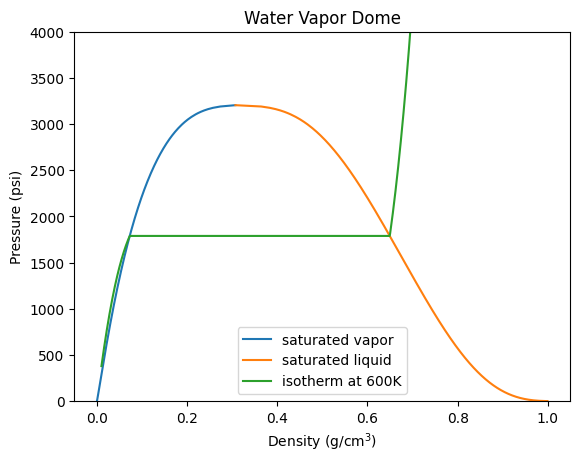

In [15]:
plt.plot(df.r,df.P,label='saturated vapor')
plt.plot(df.rl,df.Pl,label='saturated liquid')
plt.plot(density*1000/1e6,arr2.P/1e5*14.5, label='isotherm at 600K')
plt.xlabel('Density (g/cm$^3$)'); plt.ylabel('Pressure (psi)')
plt.ylim([0,4000])
plt.title('Water Vapor Dome')
plt.legend(); plt.show()

You could also create a similar plot for the temperature versus enthalpy.

In [16]:
#lets add an isobar
enthalpy = (np.linspace(10, 3200, 1000) + hf0)*1e3 # J/kg
arr3 = ct.SolutionArray(w, len(enthalpy))
arr3.HP = enthalpy, 101325*4

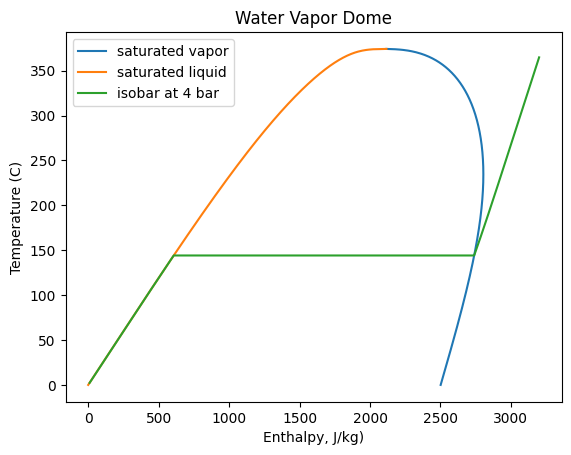

In [17]:
plt.plot(df.hv,df['T'],label='saturated vapor')
plt.plot(df.hl,df['T'],label='saturated liquid')
plt.plot(enthalpy/1e3-hf0,arr3.T-273.15, label='isobar at 4 bar')
plt.xlabel('Enthalpy, J/kg)'); plt.ylabel('Temperature (C)')
plt.title('Water Vapor Dome')
plt.legend(); plt.show()

### Application Example: Pumping

Typically pumping of a fluid can be assumed to increase the pressure to a given value assuming isentropic conditions (constant entropy). Typically, a pumps isentropic efficiency is 60%. As such, the enthalpyt and temperature rise through the pump can be found.

See futher examples here: https://nbviewer.org/url/ignite.byu.edu/che433/lectures/lecture_07_steam/rankine_.ipynb

In [18]:
p_initial, p_final = 101325*1, 101325*4 #Pa
T_initial = 300 #K
w.TPQ = T_initial, p_initial, 0
h0 = w.h; s0 = w.s
w.SP = s0, p_final
h1 = w.h; T1 = w.T
isentropic_work = h1-h0
actual_work = isentropic_work / 0.6
print(f'The isentropic work is {isentropic_work/1000:1.2f} kJ/kg')
print('The actual work is',actual_work/1000,'kJ/kg')
print(f'The associated rise in temperature is {T1-T_initial:1.2f} K')

The isentropic work is 0.30 kJ/kg
The actual work is 0.5083018274853627 kJ/kg
The associated rise in temperature is 0.01 K


In [19]:
print(w.report())


  water:

       temperature   300.01 K
          pressure   4.053e+05 Pa
           density   996.77 kg/m^3
  mean mol. weight   18.016 kg/kmol
    vapor fraction   0
   phase of matter   liquid

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -1.5858e+07       -2.8569e+08  J
   internal energy       -1.5858e+07        -2.857e+08  J
           entropy            3913.2             70500  J/K
    Gibbs function       -1.7032e+07       -3.0684e+08  J
 heat capacity c_p            4179.9             75305  J/K
 heat capacity c_v            4129.9             74404  J/K



### Other Compounds?

In [20]:
methane = ct.Methane()
methane.PQ =  101325, 1 # 1 atm (101325 Pa), saturated vapor
methane.h, methane.T

(-5047996.588604324, 111.63302142097555)

In [21]:
dir(ct)

['Arrhenius',
 'ArrheniusRate',
 'ArrheniusRateBase',
 'AxisymmetricStagnationFlow',
 'BlowersMaselRate',
 'Boundary1D',
 'BurnerFlame',
 'CanteraError',
 'CarbonDioxide',
 'ChebyshevRate',
 'ChebyshevReaction',
 'ChemicallyActivatedReaction',
 'ConstPressureReactor',
 'ConstantCp',
 'CounterflowDiffusionFlame',
 'CounterflowPremixedFlame',
 'CounterflowTwinPremixedFlame',
 'CustomRate',
 'CustomReaction',
 'Domain1D',
 'DustyGas',
 'DustyGasTransport',
 'Element',
 'ElementaryReaction',
 'ExtensibleConstPressureReactor',
 'ExtensibleIdealGasConstPressureReactor',
 'ExtensibleIdealGasReactor',
 'ExtensibleReactor',
 'Falloff',
 'FalloffRate',
 'FalloffReaction',
 'FlameBase',
 'FlowDevice',
 'FlowReactor',
 'FreeFlame',
 'FreeFlow',
 'Func1',
 'GasTransportData',
 'Heptane',
 'Hfc134a',
 'Hydrogen',
 'IdealGasConstPressureReactor',
 'IdealGasFlow',
 'IdealGasReactor',
 'ImpingingJet',
 'Inlet1D',
 'Interface',
 'InterfaceArrheniusRate',
 'InterfaceBlowersMaselRate',
 'InterfaceKinetics

## Chemical Kinetics: Methane

In [22]:
gas = ct.Solution('gri30.yaml') #methane with air

In [23]:
# Can define the initial conditions
gas.TPX = 300, 101325, 'CH4:1, O2:2, N2:0' # temperature in K, pressure in Pa, and stoichiometric mole fractions with pure oxygen
# otherwise it would be 02:2, and N2:7.52.

### Adiabatic Flame Temperature: Methane

In [24]:
gas.equilibrate('HP') #equilibrate at constant enthalpy and pressure
print(f'Adiabatic flame temperature of methane is {gas.T:1.2f} K.')
print(f'The fraction of CO in the flame is', gas['CO'].Y)
gas()

Adiabatic flame temperature of methane is 3052.22 K.
The fraction of CO in the flame is [0.20300664]

  gri30:

       temperature   3052.2 K
          pressure   1.0133e+05 Pa
           density   0.085831 kg/m^3
  mean mol. weight   21.497 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -9.2986e+05       -1.9989e+07  J
   internal energy       -2.1104e+06       -4.5367e+07  J
           entropy             13382        2.8768e+05  J/K
    Gibbs function       -4.1776e+07       -8.9805e+08  J
 heat capacity c_p            2166.9             46583  J/K
 heat capacity c_v            1780.2             38268  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2         0.0067891          0.072394           -23.533
                 H         0.0023341    

### Heat of Combustion: Methane

Lets calculate the heat of combustion of methane.

In [25]:
#reinitialize to STP in pure oxygen
gas.TPX = 300, 101325, 'CH4:1, O2:2, N2:0'

In [26]:
#calculate the heat of combustion
h1= gas.enthalpy_mass
Y_CH4 = gas["CH4"].Y[0]
gas.equilibrate('HP')

In [27]:
#equilibrate the product gases at room temperature
gas.TP = 300,101325
gas.equilibrate('TP')

In [28]:
(h1 - gas.enthalpy_mass)/1000/Y_CH4 #kJ/kg

50024.25791465254

In [29]:
gas['CO'].Y

array([5.8688253e-36])

### Product Composition (CO) versus Temperature

In [30]:
#lets add the composition of CO as a function of the equilibration temperature
ptemps = np.linspace(3100, 300, 100)  # K, product temperatures
COcomp = []
for each in ptemps:
    gas.TP = each, 101325
    gas.equilibrate('TP')
    COcomp.append(gas['CO'].Y[0])

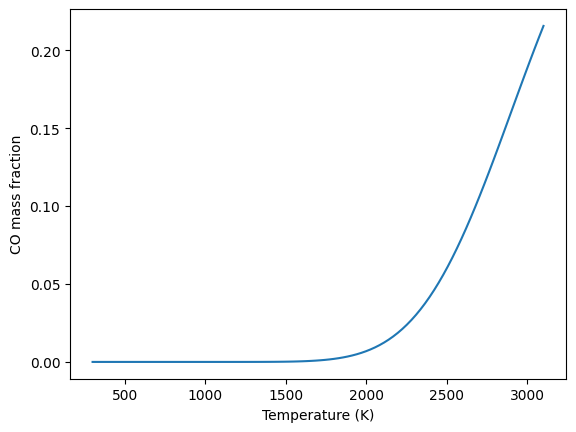

In [31]:
plt.plot(ptemps,COcomp)
plt.xlabel('Temperature (K)'); plt.ylabel('CO mass fraction')
plt.show()